<a href="https://colab.research.google.com/github/katamaranindustries/fedra/blob/main/mastercode2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('gefitinib.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cell line            958 non-null    object 
 1   TCGA classification  958 non-null    object 
 2   Tissue               958 non-null    object 
 3   Tissue sub-type      958 non-null    object 
 4   IC50                 958 non-null    float64
 5   AUC                  958 non-null    float64
dtypes: float64(2), object(4)
memory usage: 45.0+ KB


In [ ]:
categorical_cols = ['Cell line', 'TCGA classification', 'Tissue', 'Tissue sub-type']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df['Response'] = df['IC50'] <= 10

In [ ]:
X = df.drop(['IC50', 'Response'], axis=1)
y = df['Response']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)


In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

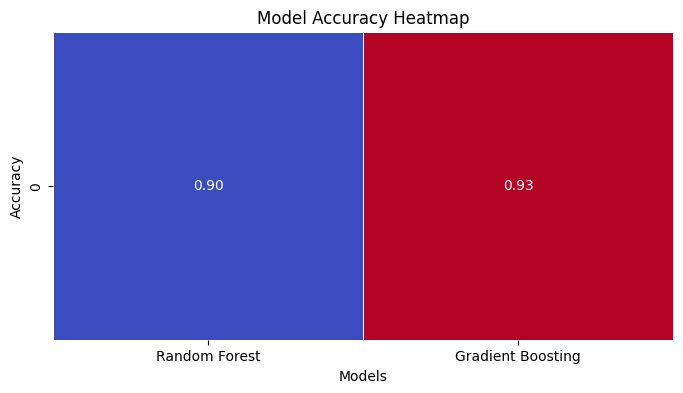

In [ ]:
accuracy_matrix = [[rf_acc, gb_acc]]
model_names = ['Random Forest', 'Gradient Boosting']
accuracy_df = pd.DataFrame(accuracy_matrix, columns=model_names)

plt.figure(figsize=(8, 4))
sns.heatmap(accuracy_df, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar=False)
plt.title('Model Accuracy Heatmap')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

<Axes: >

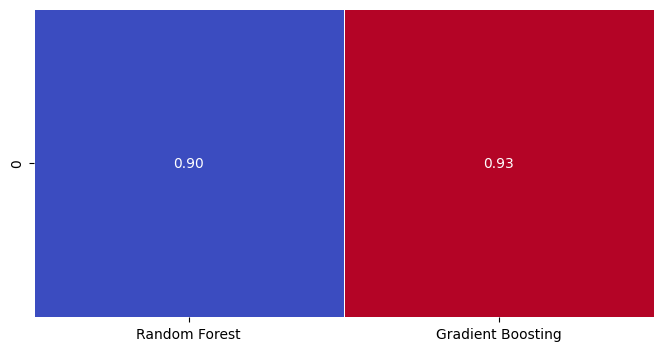

In [ ]:
accuracy_matrix = [[rf_acc, gb_acc]]
model_names = ['Random Forest', 'Gradient Boosting']
accuracy_df = pd.DataFrame(accuracy_matrix, columns=model_names)

plt.figure(figsize=(8, 4))
sns.heatmap(accuracy_df, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar=False)

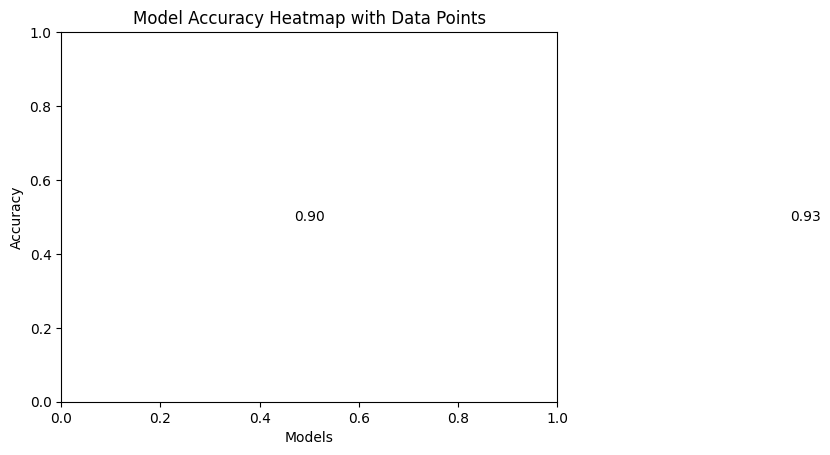

In [ ]:

# Add data points
for i in range(len(model_names)):
    plt.text(i + 0.5, 0.5, f'{accuracy_matrix[0][i]:.2f}', ha='center', va='center', color='black')

plt.title('Model Accuracy Heatmap with Data Points')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Create a heatmap with data points
accuracy_matrix = [[rf_acc, gb_acc]]
model_names = ['Random Forest', 'Gradient Boosting']
accuracy_df = pd.DataFrame(accuracy_matrix, columns=model_names)

In [ ]:
# Display data points (Response or Not) in a table
data_points = df['Response'].map({True: 'Response', False: 'Not'})
data_points_df = pd.DataFrame({'Data Points': data_points})

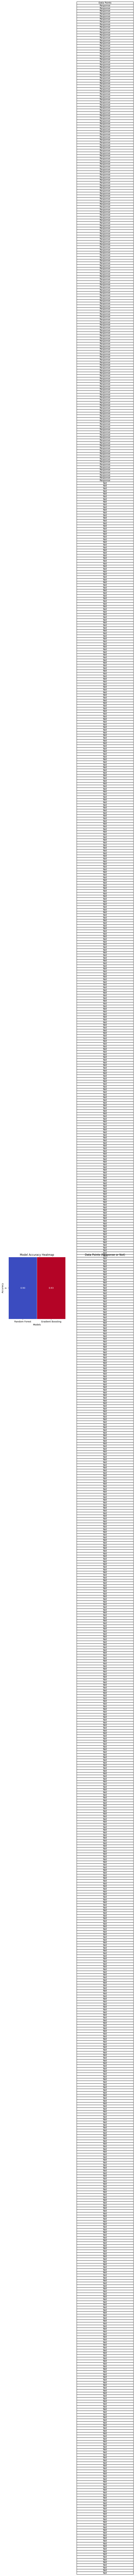

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.heatmap(accuracy_df, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar=False)
plt.title('Model Accuracy Heatmap')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Display the table
plt.subplot(122)
plt.axis('off')
plt.table(cellText=data_points_df.values, colLabels=data_points_df.columns, cellLoc='center', loc='center')
plt.title('Data Points (Response or Not)')

plt.show()

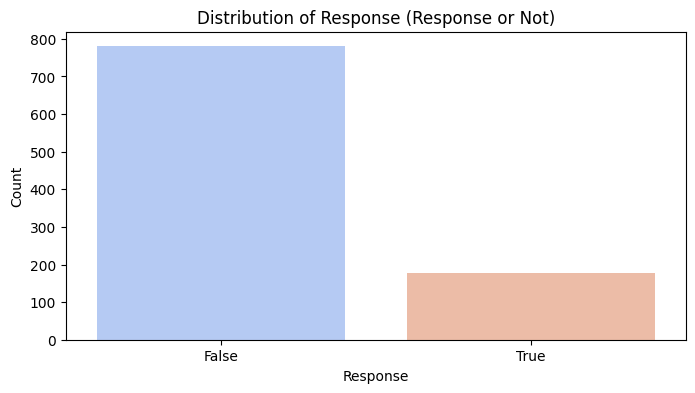

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Response', data=df, palette='coolwarm')
plt.title('Distribution of Response (Response or Not)')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd

# Load your dataset (replace 'your_data.csv' with your actual data file)
df = pd.read_csv('export.csv')

# Assuming IC50 < 500 indicates a "Response," create a new column
df['Response'] = df['IC50'] < 500

# Display the entire DataFrame with the "Response" column
print(df)

FileNotFoundError: [Errno 2] No such file or directory: 'export.csv'

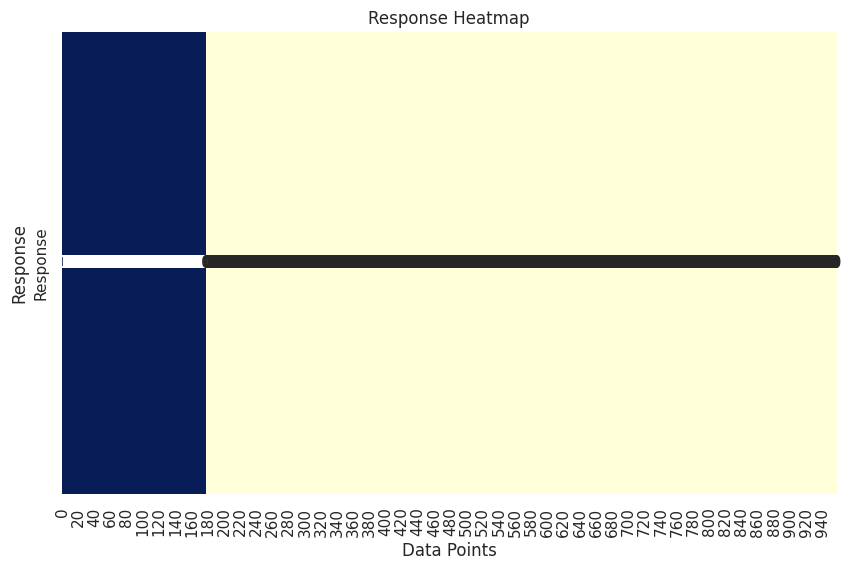

In [ ]:
cbsns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df[['Response']].T, cmap="YlGnBu", cbar=False, annot=True, fmt="d")
plt.title('Response Heatmap')
plt.xlabel('Data Points')
plt.ylabel('Response')
plt.show()









In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
sns.set(style="whitegrid")


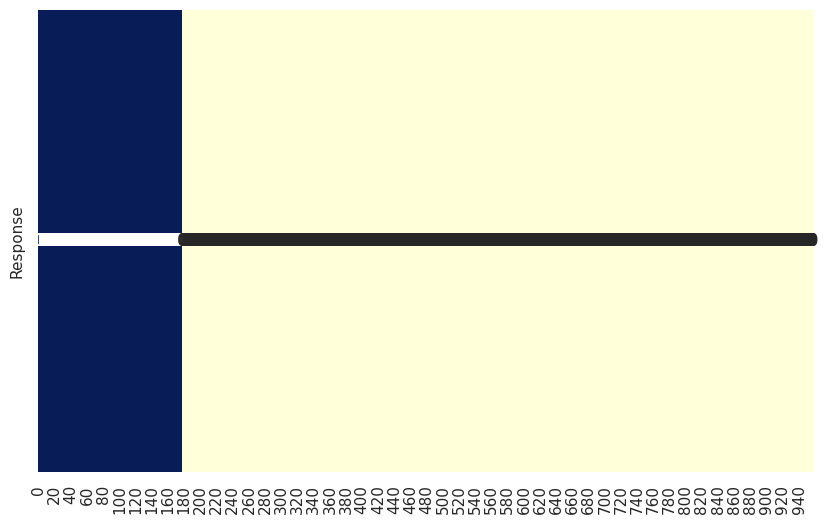

In [ ]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df[['Response']].T, cmap="YlGnBu", cbar=False, annot=True, fmt="d")


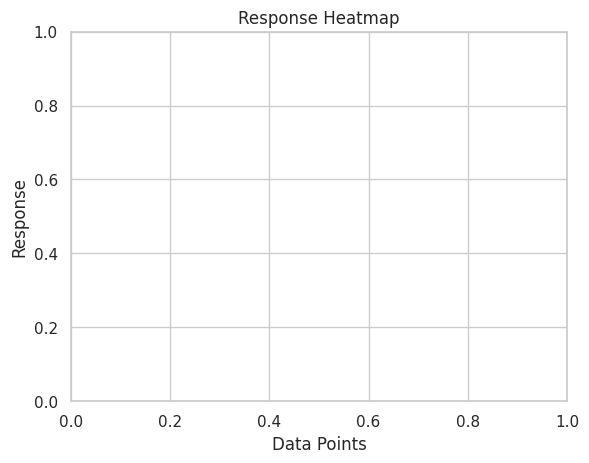

In [ ]:
plt.title('Response Heatmap')
plt.xlabel('Data Points')
plt.ylabel('Response')
plt.show()